In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("E:\Datasets\Churn_Modelling.csv")

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [14]:
x=df.drop(columns=['Exited']).values
y=df['Exited'].values

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [16]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(x_train)
X_test=ss.transform(x_test)

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Activation function Sigmoid

In [18]:
model=Sequential()
model.add(Dense(units=11,activation='sigmoid',input_dim=11))  #Input layers
# model.add(Dense(11,activation='sigmoid')  # Hidden layers
model.add(Dense(units=1,activation='sigmoid'))  # Output layer

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [20]:
X_train = tensorflow.expand_dims(X_train, axis=-1)

In [21]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.7722 - accuracy: 0.4646
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4989 - accuracy: 0.7955
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4504 - accuracy: 0.7981
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4358 - accuracy: 0.8041
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4287 - accuracy: 0.8083
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4248 - accuracy: 0.8100
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4223 - accuracy: 0.8124
Epoch 8/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4199 - accuracy: 0.8108
Epoch 9/10
250/250 [==============================] - 1s 4ms/step - loss: 0.4177 - accuracy: 0.8148
Epoch 10/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4152 - accuracy: 0.8138

In [23]:
model.layers[1].get_weights()

[array([[-0.41539344],
        [ 0.44398344],
        [ 0.35974374],
        [ 0.4379931 ],
        [-0.42239985],
        [-1.0143925 ],
        [ 0.21776026],
        [-0.55154127],
        [-1.0484303 ],
        [ 0.61298174],
        [-0.5657608 ]], dtype=float32),
 array([-0.32059953], dtype=float32)]

In [24]:
y_log=model.predict(X_test)

63/63 [==============================] - 0s 3ms/step


In [25]:
y_pred=np.where(y_log>0.5,1,0)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8185

### Activation function RELU

In [27]:
model=Sequential()
model.add(Dense(units=11,activation='relu',input_dim=11))  #Input layers
model.add(Dense(11,activation='relu'))  #Input layers
model.add(Dense(units=1,activation='sigmoid'))  # Output layer

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 8ms/step - loss: 0.5493 - accuracy: 0.7517 - val_loss: 0.4809 - val_accuracy: 0.7900
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4541 - accuracy: 0.7983 - val_loss: 0.4490 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4318 - accuracy: 0.8036 - val_loss: 0.4363 - val_accuracy: 0.8094
Epoch 4/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4193 - accuracy: 0.8111 - val_loss: 0.4260 - val_accuracy: 0.8138
Epoch 5/100
200/200 [==============================] - 1s 6ms/step - loss: 0.4071 - accuracy: 0.8261 - val_loss: 0.4149 - val_accuracy: 0.8250
Epoch 6/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3945 - accuracy: 0.8309 - val_loss: 0.4040 - val_accuracy: 0.8275
Epoch 7/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3820 - accuracy: 0.8395 - val_loss: 0.3949 - val_accuracy: 0.8300

Epoch 58/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3127 - accuracy: 0.8706 - val_loss: 0.3622 - val_accuracy: 0.8531
Epoch 59/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3123 - accuracy: 0.8703 - val_loss: 0.3621 - val_accuracy: 0.8537
Epoch 60/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3133 - accuracy: 0.8714 - val_loss: 0.3608 - val_accuracy: 0.8544
Epoch 61/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3127 - accuracy: 0.8719 - val_loss: 0.3607 - val_accuracy: 0.8525
Epoch 62/100
200/200 [==============================] - 1s 6ms/step - loss: 0.3126 - accuracy: 0.8700 - val_loss: 0.3604 - val_accuracy: 0.8537
Epoch 63/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3123 - accuracy: 0.8706 - val_loss: 0.3618 - val_accuracy: 0.8525
Epoch 64/100
200/200 [==============================] - 1s 7ms/step - loss: 0.3116 - accuracy: 0.8708 - val_loss: 0.3605 - val_accuracy:

In [30]:
model.layers[1].get_weights()  # weights

[array([[ 0.252017  ,  0.3980697 ,  0.19471504,  0.00257842,  0.3447875 ,
          0.42558843, -0.06584541,  0.30932298,  0.3872126 ,  0.76367694,
          0.2746623 ],
        [-0.38782394,  0.36207688, -0.37295443, -0.4377599 ,  0.13503422,
          0.13307355,  0.01383227,  0.61993897,  0.18545738,  0.28340402,
          0.38393286],
        [ 0.5166969 ,  0.5128391 ,  0.42619306,  0.36765826, -0.28793508,
         -0.10888518,  0.33695683, -0.5817379 , -0.66741765, -0.46502817,
          0.2825875 ],
        [ 0.4385945 ,  0.58335197, -0.17196341,  0.1468733 , -0.4435108 ,
          0.27061322,  0.2156785 ,  0.0268234 ,  0.22321968, -0.22352612,
         -0.5877417 ],
        [ 0.62396425,  0.07407404, -0.93067753,  0.18116118,  0.32289612,
         -0.04918017,  0.00268979, -0.3040808 ,  0.13446864, -0.14457938,
          0.75921965],
        [-0.33479485, -0.20239383,  0.5780166 ,  0.20972686,  0.25091457,
          0.1909686 ,  0.6711407 , -0.5244547 , -0.04802798, -0.6226094

In [32]:
y_log=model.predict(X_test)

63/63 [==============================] - 0s 4ms/step


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8185

In [34]:
import matplotlib.pyplot as plt

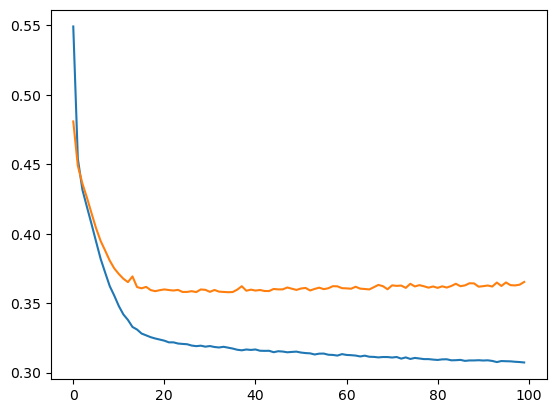

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

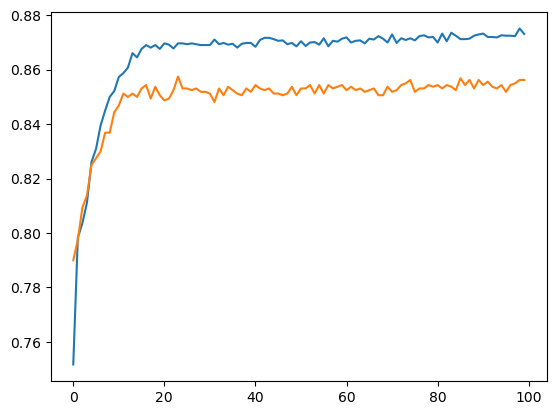

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])